In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

In [2]:
kcc_data = pd.read_csv('/content/drive/My Drive/mergedData.csv')

In [3]:
kcc_data.dropna(subset=['QueryText'], inplace=True)

In [4]:
kcc_data.describe().transpose()

,count,unique,top,freq
Season,266970,3,KHARIF,172177
Sector,300690,4,AGRICULTURE,229320
Category,300254,21,Others,99820
Crop,299979,290,Others,99964
QueryType,276885,64,\tPlant Protection\t,122899
QueryText,300690,91679,TELL ME WEATHER INFORMATION,3834
KCCAns,300411,116479,NO RAIN POSSIBILITY IN NEXT 5 DAYS,1946
StateName,300690,33,UTTAR PRADESH,40364
DistrictName,300690,566,BHATINDA,7740
BlockName,295250,5446,DELHI,3171


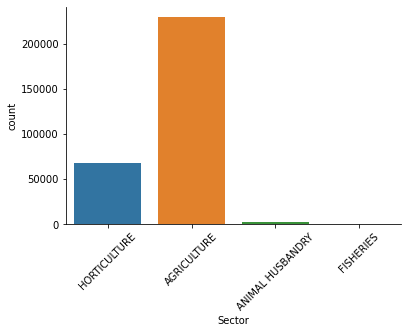

In [5]:
sns.countplot(kcc_data['Sector'])
sns.set(rc={'figure.figsize':(8,6)})
plt.xticks(rotation=45)
sns.despine()
plt.show()

In [6]:
kcc_data['Sector'].value_counts(normalize=True, dropna=False)*100

AGRICULTURE         76.264591
HORTICULTURE        22.700456
ANIMAL HUSBANDRY     0.843726
FISHERIES            0.191227
Name: Sector, dtype: float64

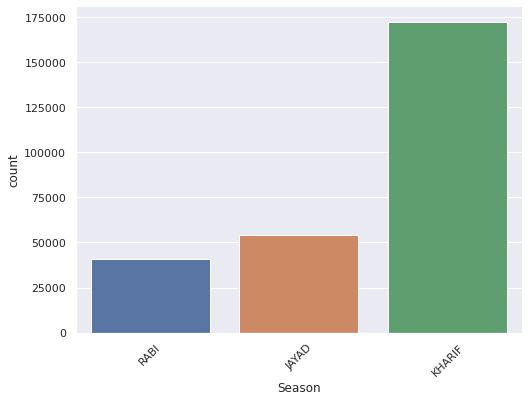

In [7]:
sns.countplot(kcc_data['Season'])
sns.set(rc={'figure.figsize':(8,6)})
plt.xticks(rotation=45)
sns.despine()
plt.show()

In [8]:
kcc_data['Season'].value_counts(normalize=True, dropna=False)*100

KHARIF    57.260634
JAYAD     18.007250
RABI      13.517909
NaN       11.214207
Name: Season, dtype: float64

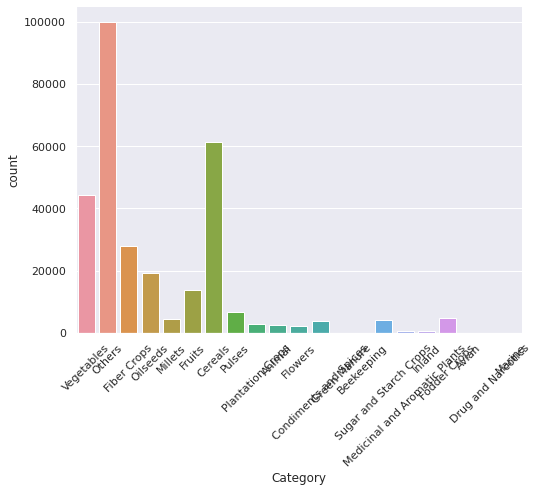

In [9]:
sns.countplot(kcc_data['Category'])
sns.set(rc={'figure.figsize':(20,18)})
plt.xticks(rotation=45)
sns.despine()


In [10]:
#Import libraries for text preprocessing
from tqdm.notebook import tqdm
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords  
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist
lemma = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [11]:
rand = np.random.randint(0, kcc_data.shape[0])
kcc_data['QueryText'].iloc[rand]

'DHAAN ME WEED KI PROBLEM'

In [12]:
def preprocess(text):
  text = str(text).lower()
  text = re.sub(r'[^a-z0-9 ]+', ' ', text)
  text = text.strip()
  text = re.sub(r' +', ' ', text)
  text_words = text.split()
  text_words = [word for word in text_words if word not in set(stopwords.words('english'))]
  return ' '.join(text_words) 
 # text_words = [lemma.lemmatize(word) for word in text_words]

In [13]:
tqdm.pandas()
kcc_data['QueryText_clean'] = kcc_data['QueryText'].progress_apply(preprocess)

In [15]:
tqdm.pandas()
kcc_data['QueryType_clean'] = kcc_data['QueryType'].progress_apply(preprocess)

In [16]:
kcc_data[kcc_data['Category']=='Others']['QueryType_clean'].value_counts()

weather                           69879
nan                                8093
plant protection                   6519
government schemes                 5525
market information                 2562
field preparation                  1224
agriculture mechanization           859
training exposure visits            827
soil testing                        813
cultural practices                  734
varieties                           468
seeds                               421
bio pesticides bio fertilizers      306
credit                              305
fertilizer use availability         290
water management                    202
weed management                     172
crop insurance                      146
sowing time weather                 129
nutrient management                 126
organic farming                      81
storage                              74
power roads etc                      32
soil health card                     18
post harvest preservation            15


In [17]:
kcc_data[kcc_data['Category']=='Others']['QueryType_clean'].value_counts(normalize=True, dropna=False)*100

weather                           70.005009
nan                                8.107594
plant protection                   6.530755
government schemes                 5.534963
market information                 2.566620
field preparation                  1.226207
agriculture mechanization          0.860549
training exposure visits           0.828491
soil testing                       0.814466
cultural practices                 0.735324
varieties                          0.468844
seeds                              0.421759
bio pesticides bio fertilizers     0.306552
credit                             0.305550
fertilizer use availability        0.290523
water management                   0.202364
weed management                    0.172310
crop insurance                     0.146263
sowing time weather                0.129233
nutrient management                0.126227
organic farming                    0.081146
storage                            0.074133
power roads etc                 

In [18]:
excluded_types = ['weather', 'nan', 'government schemes', 'market information']

In [19]:
kcc_data = kcc_data[~(kcc_data['QueryType_clean'].isin(excluded_types))]

In [20]:
kcc_data.head()

,Season,Sector,Category,Crop,QueryType,QueryText,KCCAns,StateName,DistrictName,BlockName,CreatedOn,QueryText_clean,QueryType_clean
0,RABI,HORTICULTURE,Vegetables,Tomato,\tPlant Protection\t,CONTROL OF ROOT ROT IN TOMATO,RECOMMENDED FOR SPRAY COPPER OXYCHLORIDE 50%WP...,A AND N ISLANDS,NORTH AND MIDDLE ANDAMAN,MAYABUNDER ...,15:33.3,control root rot tomato,plant protection
7,NaN,HORTICULTURE,Vegetables,Onion,\tPlant Protection\t,protection problems in onion,spray urea,ANDHRA PRADESH,ANANTPUR,GUMMAGATTA ...,41:51.0,protection problems onion,plant protection
21,NaN,AGRICULTURE,Fiber Crops,Cotton (Kapas),Cultural Practices,flower drop,spray Plano fix 2.5ml/l.,ANDHRA PRADESH,ANANTPUR,BELUGUPPA ...,13:46.0,flower drop,cultural practices
22,NaN,AGRICULTURE,Others,Others,Crop Insurance,monocrotophos dosage,monocrotophos dosage 2 ml per litre,ANDHRA PRADESH,ANANTPUR,YADIKI ...,38:38.0,monocrotophos dosage,crop insurance
24,NaN,AGRICULTURE,Oilseeds,"Castor (Rehri, Rendi, Arandi)",Cultural Practices,sowing time,june july 31st,ANDHRA PRADESH,ANANTPUR,CHILAMATHUR ...,06:44.0,sowing time,cultural practices


In [21]:
kcc_data = kcc_data[~(kcc_data['QueryText_clean']=='')]

In [22]:
kcc_data.head()

,Season,Sector,Category,Crop,QueryType,QueryText,KCCAns,StateName,DistrictName,BlockName,CreatedOn,QueryText_clean,QueryType_clean
0,RABI,HORTICULTURE,Vegetables,Tomato,\tPlant Protection\t,CONTROL OF ROOT ROT IN TOMATO,RECOMMENDED FOR SPRAY COPPER OXYCHLORIDE 50%WP...,A AND N ISLANDS,NORTH AND MIDDLE ANDAMAN,MAYABUNDER ...,15:33.3,control root rot tomato,plant protection
7,NaN,HORTICULTURE,Vegetables,Onion,\tPlant Protection\t,protection problems in onion,spray urea,ANDHRA PRADESH,ANANTPUR,GUMMAGATTA ...,41:51.0,protection problems onion,plant protection
21,NaN,AGRICULTURE,Fiber Crops,Cotton (Kapas),Cultural Practices,flower drop,spray Plano fix 2.5ml/l.,ANDHRA PRADESH,ANANTPUR,BELUGUPPA ...,13:46.0,flower drop,cultural practices
22,NaN,AGRICULTURE,Others,Others,Crop Insurance,monocrotophos dosage,monocrotophos dosage 2 ml per litre,ANDHRA PRADESH,ANANTPUR,YADIKI ...,38:38.0,monocrotophos dosage,crop insurance
24,NaN,AGRICULTURE,Oilseeds,"Castor (Rehri, Rendi, Arandi)",Cultural Practices,sowing time,june july 31st,ANDHRA PRADESH,ANANTPUR,CHILAMATHUR ...,06:44.0,sowing time,cultural practices


In [23]:
kcc_data.columns

Index(['Season', 'Sector', 'Category', 'Crop', 'QueryType', 'QueryText',
       'KCCAns', 'StateName', 'DistrictName', 'BlockName', 'CreatedOn',
       'QueryText_clean', 'QueryType_clean'],
      dtype='object')

In [24]:
kcc_data_final = kcc_data[['StateName', 'DistrictName', 'BlockName', 'QueryType_clean', 'QueryText_clean', 'KCCAns']]

In [25]:
kcc_data_final.head()

,StateName,DistrictName,BlockName,QueryType_clean,QueryText_clean,KCCAns
0,A AND N ISLANDS,NORTH AND MIDDLE ANDAMAN,MAYABUNDER ...,plant protection,control root rot tomato,RECOMMENDED FOR SPRAY COPPER OXYCHLORIDE 50%WP...
7,ANDHRA PRADESH,ANANTPUR,GUMMAGATTA ...,plant protection,protection problems onion,spray urea
21,ANDHRA PRADESH,ANANTPUR,BELUGUPPA ...,cultural practices,flower drop,spray Plano fix 2.5ml/l.
22,ANDHRA PRADESH,ANANTPUR,YADIKI ...,crop insurance,monocrotophos dosage,monocrotophos dosage 2 ml per litre
24,ANDHRA PRADESH,ANANTPUR,CHILAMATHUR ...,cultural practices,sowing time,june july 31st


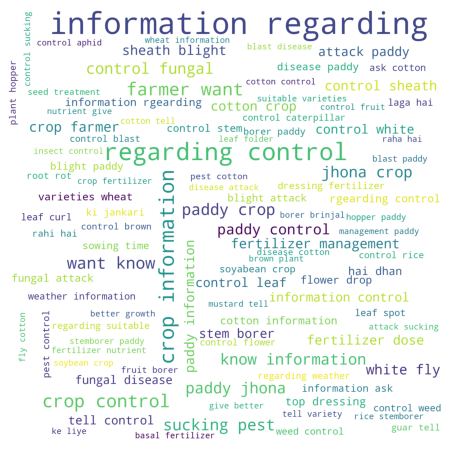

In [26]:
## Plot WorldCloud
from wordcloud import WordCloud, STOPWORDS
all_words = ' '.join(kcc_data_final['QueryText_clean'])
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white', max_words=100)
wordcloud = wordcloud.generate(all_words)
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

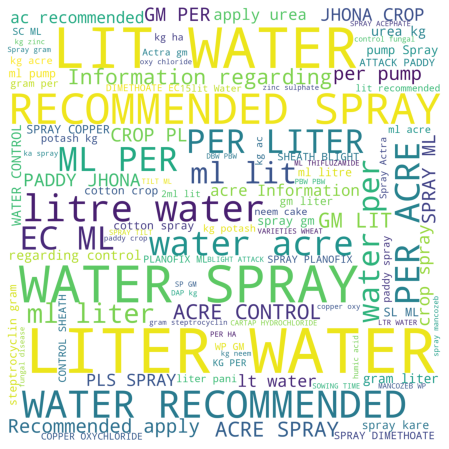

In [27]:
 all_words = ' '.join(kcc_data_final['KCCAns'].astype(str))
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white', max_words=100)
wordcloud = wordcloud.generate(all_words)
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
kcc_data_final.to_csv('/content/drive/My Drive/final.csv')

## Semantic Embeddings

This work will create **semantic embeddings of query texts using BERT**.

This work, 
1.   Uses BERT to embedded query texts using bert-base-nli-mean-tokens pretrained model
3.   finally runs a query and returns the top 5 similar queries and their provided answers.


**References** :

*  Used the library provided by [UKPLab](https://github.com/UKPLab) called [sentence-transformers](https://github.com/UKPLab/sentence-transformers), this library makes it truly easy to use BERT and other architectures like ALBERT,XLNet for sentence embedding, they also provide simple interface to query and cluster data.

*  Used the concept of drawing BERT, disccussed here [Jay Alammar](http://jalammar.github.io/) in illustrating how our architecture works, his blogs are extremly informative and easily understood.
*  Used the pre-trained models disccess in Conneau et al., 2017, show in the InferSent-Paper (Supervised Learning of Universal Sentence Representations from Natural Language Inference Data) that training on Natural Language Inference (NLI) data can produce universal sentence embeddings.


In [29]:
#first install the library that would help us use BERT in an easy to use interface
#https://github.com/UKPLab/sentence-transformers/tree/master/sentence_transformers
!pip install -U sentence-transformers --quiet

     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 1.5MB 13.9MB/s 
     |████████████████████████████████| 1.2MB 49.1MB/s 
     |████████████████████████████████| 890kB 58.7MB/s 
     |████████████████████████████████| 2.9MB 54.8MB/s 


In [30]:
query_list = list(kcc_data_final['QueryText_clean'])

In [31]:
%%time
from sentence_transformers import SentenceTransformer
import scipy.spatial
import pickle as pkl
embedder = SentenceTransformer('roberta-base-nli-stsb-mean-tokens')

# Corpus with example sentences
corpus = query_list
corpus_embeddings = embedder.encode(corpus, show_progress_bar=True)

100%|██████████| 461M/461M [00:16<00:00, 27.4MB/s]



CPU times: user 2min 18s, sys: 38.7 s, total: 2min 57s
Wall time: 3min 21s


In [32]:
pkl.dump(corpus_embeddings, open('sentence_embeddings.pkl', 'wb'))

In [33]:
"""
This is a simple application for sentence embeddings: semantic search
We have a corpus with various sentences. Then, for a given query sentence,
we want to find the most similar sentence in this corpus.
This script outputs for various queries the top 5 most similar sentences in the corpus.
"""

# Query sentences:
queries = ['Paddy is infected',
 'My sugarcane crop is infected',
 'What are the differenet categories of wheat?',
 'fertilizers application in wheat',
 'how to save my lemons from fungi?']
query_embeddings = embedder.encode(queries,show_progress_bar=True)

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
closest_n = 5
print("\nTop 5 most similar sentences in corpus:")
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n==========================Query==============================")
    print("===",query,"=====")
    print("=========================================================")


    for idx, distance in results[0:closest_n]:
        print("Score:   ", "(Score: %.4f)" % (1-distance) , "\n" )
        print("Question:   ", corpus[idx].strip(), "\n" )
        print("Answer:  " , kcc_data_final["KCCAns"].iloc[idx] , "\n")
        print("-------------------------------------------")



Top 5 most similar sentences in corpus:


==========================Query==============================
=== Paddy is infected =====
Score:    (Score: 0.9159) 

Question:    paddy disease 

Answer:   magnesium sulphate 20 gm per liter water 

-------------------------------------------
Score:    (Score: 0.9159) 

Question:    paddy disease 

Answer:   carbedizium 2gm per liter  water 

-------------------------------------------
Score:    (Score: 0.9159) 

Question:    paddy disease 

Answer:   carbendizium 3 gm pre liter water 

-------------------------------------------
Score:    (Score: 0.9159) 

Question:    paddy disease 

Answer:   MANCOZEB 2GM PER LITER WATER 

-------------------------------------------
Score:    (Score: 0.9159) 

Question:    paddy disease 

Answer:   urea 

-------------------------------------------


==========================Query==============================
=== My sugarcane crop is infected =====
Score:    (Score: 0.8490) 

Question:    fungal infecti